In [1]:
from tensorflow import keras

In [2]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 17s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
print(train_input.shape,train_target.shape)

(60000, 28, 28) (60000,)


In [6]:
print(test_input.shape,test_target.shape)

(10000, 28, 28) (10000,)


In [7]:
import pandas as pd
df_target = pd.DataFrame(train_target)
df_target.value_counts()

0
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

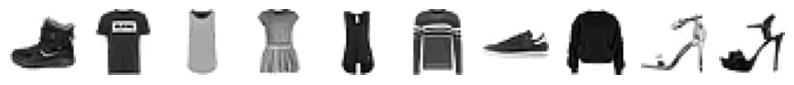

In [19]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r')  # gray_r: 현재색 반전 # 0,0,0 검정색 - 255,255,255 흰색
    axs[i].axis('off') # 눈금제거
plt.show()

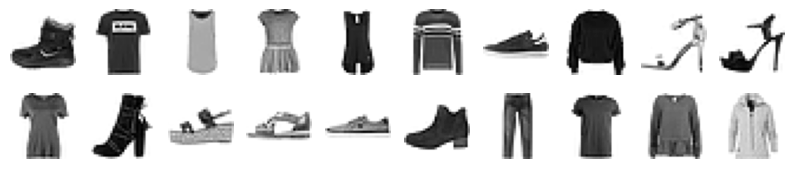

In [34]:
# 두 줄을 출력해보세요
fig,axs = plt.subplots(2,10,figsize=(10,2))

for i in range(2):
    for j in range(10):
        axs[i,j].imshow(train_input[10*i+j],cmap='gray_r')
        axs[i,j].axis('off') # 눈금제거
plt.show()

In [11]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [12]:
# 패션 아이템 카테고리
# 0 : 티셔츠
# 1 : 바지
# 2 : 스웨터
# 3 : 드레스
# 4 : 코트
# 5 : 샌달
# 6 : 셔츠
# 7 : 스니커즈
# 8 : 가방
# 9 : 앵클부츠

In [13]:
import numpy as np
print(np.unique(train_target,return_counts=True))   
# train_target데이터의 유일한 값 추출, return_counts : 각각의 유일한 값의 개수 리턴
# 각 항목당 6천개씩 있는 것을 알 수 있다

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [39]:
# 경사하강법으로 패션 아이템 분류하기!
# 각 픽셀은 0~255 값을 가지기 때문에, 0~1 사이의 값으로 정규화
# 특성마다 값의 범위가 너무 다르면 올바르게 손실 함수의 경사를 내려올 수가 없기 때문이다.

train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1,28*28)   # 784개를 1개의 묶음으로 만들어달라
# 하나의 데이터 픽셀이 28*28 이기 때문

# reshape(행,열)

In [40]:
test_scaled = test_input/255.0
test_scaled = test_scaled.reshape(-1,28*28)

In [38]:
print(train_scaled.shape)

(60000, 784)


In [45]:
# 경사 하강법
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss',max_iter=9, random_state=42)
scores = cross_validate(sc, train_scaled,train_target,n_jobs=1)
print(np.mean(scores['test_score']))
# print(scores)


c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'fit_time': array([10.45608425, 10.45402312, 10.243644  , 10.34530759, 11.0943594 ]), 'score_time': array([0.02991295, 0.03889751, 0.03391409, 0.03989196, 0.03691983]), 'test_score': array([0.83341667, 0.83458333, 0.848     , 0.80241667, 0.8345    ])}


c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [46]:
# 반복 300번
# partial_fit : 누적해서 훈련을 시킴

# 그래프를 그리기 위한 리스트
train_score = []
test_score = []

classes = np.unique(train_target)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [48]:
for _ in range(20):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

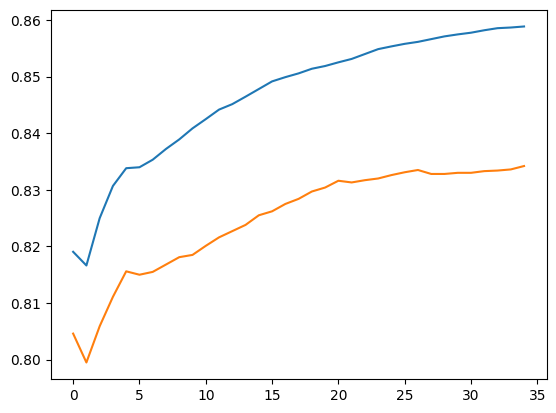

In [49]:
plt.plot(train_score)
plt.plot(test_score)

In [52]:
# 경사 하강법
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss',max_iter=20,tol=None, random_state=42)
scores = cross_validate(sc, train_scaled,train_target,n_jobs=1)
print(np.mean(scores['test_score']))

0.8440666666666667
